<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/NN9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch 
from torch import nn

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split

In [12]:
NUM_CLASSES = 4
NUM_FEATURE = 2
RANDOM_SEED = 42
NUM_SAMPLE = 1000

X_blob, y_blob = make_blobs(n_samples=NUM_SAMPLE,
                           n_features=NUM_FEATURE,
                           centers= NUM_CLASSES, 
                           cluster_std=1.5,
                           random_state= RANDOM_SEED)

In [16]:
X_blob= torch.from_numpy(X_blob).type(torch.float).to(device)
y_blob= torch.from_numpy(y_blob).type(torch.float).to(device)

In [21]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(
    X_blob, y_blob, random_state=42, test_size=0.2
)

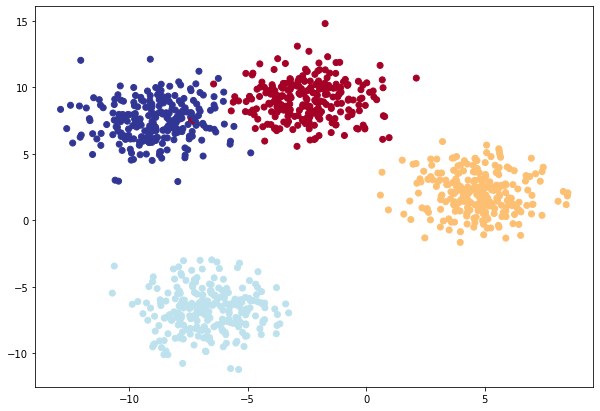

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0].cpu(), X_blob[:,1].cpu(), c=y_blob.cpu(), cmap= plt.cm.RdYlBu)

In [31]:
torch.unique(y_blob)

tensor([0., 1., 2., 3.], device='cuda:0')

In [35]:
class BlobModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers= nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 4)
    )
  def forward(self, x):
    x=self.layers(x)
    return(x)

model_0= BlobModel().to(device)
model_0

BlobModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [37]:
loss_fn= torch.nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(model_0.parameters(), 
                            lr= 1e-3)

In [38]:
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc 

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train= X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test= X_blob_test.to(device), y_blob_test.to(device)

epochs=1000

for epoch in range(epochs):

  #Training Data
  model_0.train()
  ##Forward propagation
  output=model_0(X_blob_train)
  y_pred= torch.softmax(output, dim=1).argmax(dim=1)
  ## Loss Function
  loss= loss_fn(output, y_blob_train.long())
  acc= accuracy_fn(y_blob_train, y_pred)
  ## optimizer zero grad
  optimizer.zero_grad
  ## Loss Back Propagation
  loss.backward()
  #optimizer step
  optimizer.step()

  #Testing our model
  model_0.eval()
  with torch.inference_mode():
    #Forward Propagation
    test_output= model_0(X_blob_test)
    test_pred= torch.softmax(test_output, dim=1).argmax(dim=1)
    # Loss Function
    test_loss= loss_fn(test_output, y_blob_test.long())
    test_acc = accuracy_fn(y_blob_test, test_pred)

  if epoch %10==0:
    print(f"Epochs:{epoch} | Loss: {loss} | Acc:{acc} | Test Loss: {test_loss} | Test Acc:{test_acc }")

Epochs:0 | Loss: 1.3601784706115723 | Acc:17.875 | Test Loss: 1.3399854898452759 | Test Acc:18.0
Epochs:10 | Loss: 1.2399985790252686 | Acc:38.625 | Test Loss: 1.2167242765426636 | Test Acc:40.5
Epochs:20 | Loss: 1.1232020854949951 | Acc:77.875 | Test Loss: 1.0968509912490845 | Test Acc:82.5
Epochs:30 | Loss: 1.012238621711731 | Acc:95.5 | Test Loss: 0.9833019971847534 | Test Acc:97.5
Epochs:40 | Loss: 0.9115514159202576 | Acc:96.75 | Test Loss: 0.8802904486656189 | Test Acc:98.0
Epochs:50 | Loss: 0.825753390789032 | Acc:97.0 | Test Loss: 0.7920054793357849 | Test Acc:98.5
Epochs:60 | Loss: 0.7491479516029358 | Acc:96.5 | Test Loss: 0.711577296257019 | Test Acc:97.5
Epochs:70 | Loss: 0.6729061007499695 | Acc:93.125 | Test Loss: 0.6314952373504639 | Test Acc:95.5
Epochs:80 | Loss: 0.6017568111419678 | Acc:90.25 | Test Loss: 0.5577723979949951 | Test Acc:92.0
Epochs:90 | Loss: 0.5404461622238159 | Acc:88.375 | Test Loss: 0.4958050549030304 | Test Acc:91.0
Epochs:100 | Loss: 0.48885729908

In [45]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -28.3637,   50.6721,  -54.0594,  -68.1202],
        [  -4.7894,  -92.4102,    2.7258,   53.4702],
        [-148.7245, -203.6005,  285.9088,   61.7360],
        [ -26.0464,   42.4738,  -35.0750,  -49.8256],
        [  37.2087,  -24.1949,  -59.4064,  -27.8906],
        [ -10.9524, -118.4980,   11.8208,   71.5620],
        [-141.2367, -189.0735,  268.1262,   53.8388],
        [  44.6448,  -35.6122,  -49.9051,  -14.4335],
        [-169.4109, -240.9912,  327.5618,   80.0920],
        [  43.5708,  -33.7601,  -51.9786,  -16.9942]], device='cuda:0')

In [49]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("File already existed")
else:
  print("Downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb")as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
     

Downloading


In [50]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.], device='cuda:0')
Test accuracy: 98.0%


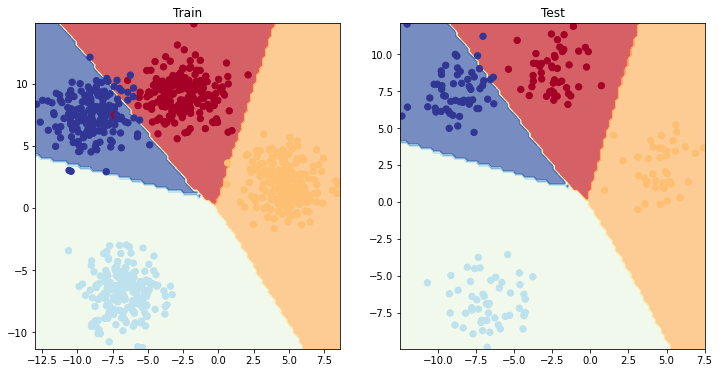

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)

In [54]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds.int(), y_blob_test.int())

tensor(0.9800, device='cuda:0')